In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# I/O
main = pd.read_csv(os.path.join(os.getcwd(), 'input/main.csv'))
leiden = pd.read_csv(os.path.join(os.getcwd(), 'input/CRC-097_leiden.csv'))

out = os.path.join(os.getcwd(), 'output/cluster_frequency')
if not os.path.exists(out):
    os.makedirs(out)

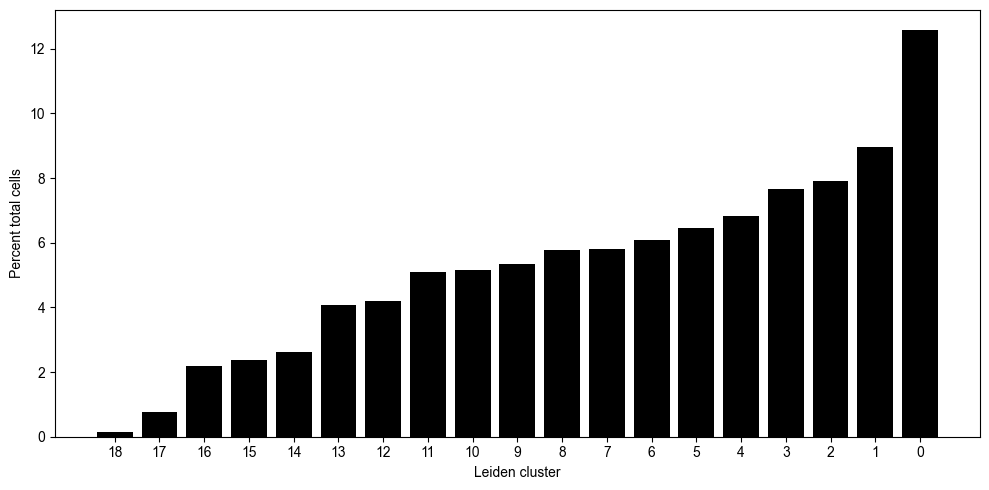

Cluster
18     0.153272
17     0.765216
16     2.177914
15     2.364957
14     2.610608
13     4.062793
12     4.212739
11     5.098494
10     5.151697
9      5.339364
8      5.772474
7      5.810714
6      6.091695
5      6.465055
4      6.822827
3      7.652053
2      7.905186
1      8.973516
0     12.569427
dtype: float64


In [3]:
# segmentation-based cluster frequency (full)

plt.rcParams['font.family'] = 'Arial'

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(
    x=leiden.groupby('Cluster').size().sort_values().index.astype('str'),
    height=(leiden.groupby('Cluster').size().sort_values() / len(leiden)) * 100, color='k'
)
plt.xlabel('Leiden cluster')
plt.ylabel('Percent total cells')
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(out, 'segmentation_full.pdf'))
plt.close('all')
print((leiden.groupby('Cluster').size().sort_values()/leiden.groupby('Cluster').size().sort_values().sum())*100)

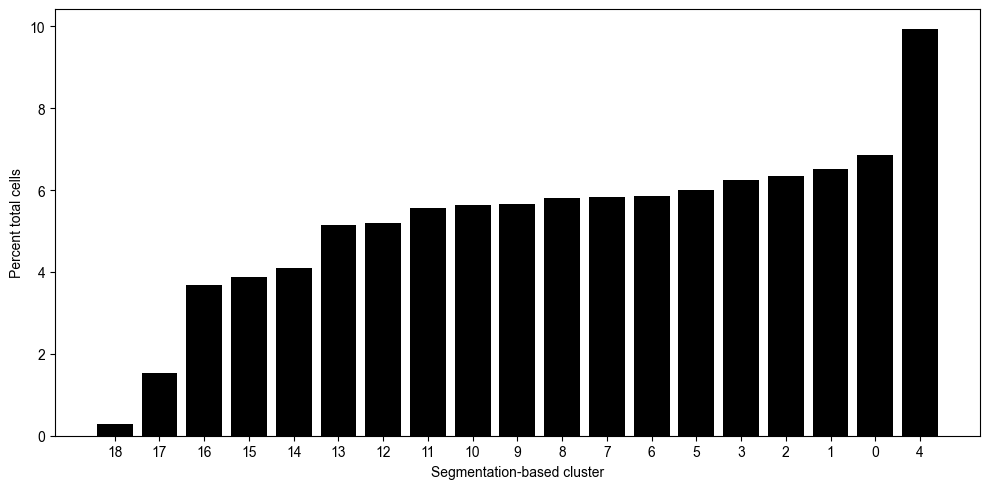

Leiden
18    0.295264
17    1.527790
16    3.674030
15    3.875735
14    4.100569
13    5.138266
12    5.183066
11    5.554178
10    5.644195
9     5.646904
8     5.798599
7     5.824229
6     5.844858
5     6.012181
3     6.246601
2     6.335576
1     6.520194
0     6.853799
4     9.923965
dtype: float64


In [4]:
# segmentation-based cluster frequency (after class balancing)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(
    x=main.groupby('Leiden').size().sort_values().index.astype('str'),
    height=(main.groupby('Leiden').size().sort_values() / len(main)) * 100, color='k'
)
plt.xlabel('Segmentation-based cluster')
plt.ylabel('Percent total cells')
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(out, 'segmentation_balanced.pdf'))
plt.close('all')
print(
    (main.groupby('Leiden').size().sort_values()/main.groupby('Leiden').size().sort_values().sum())*100
)

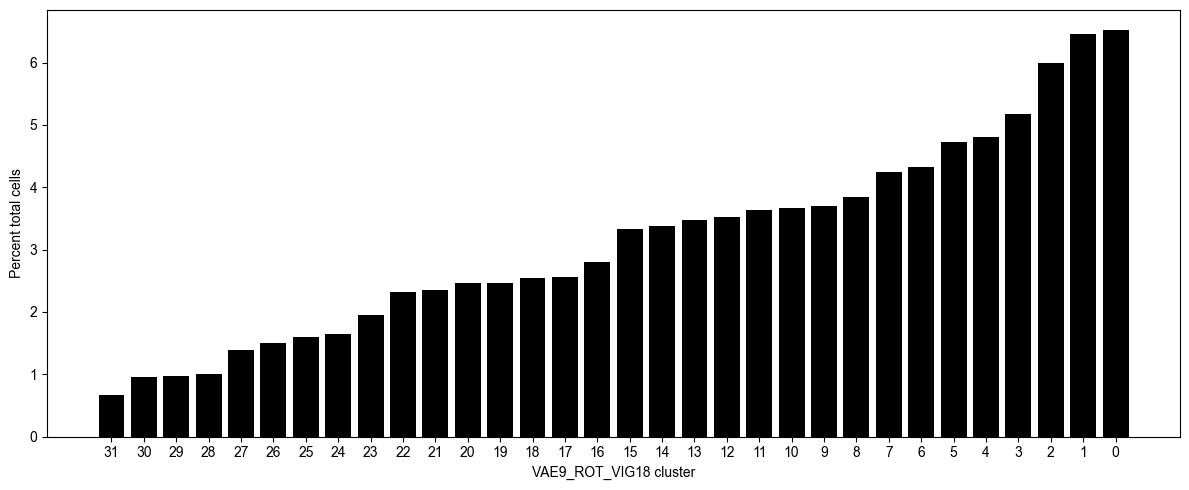

VAE9_ROT_VIG18
31    0.674920
30    0.958307
29    0.968517
28    0.998939
27    1.382554
26    1.493825
25    1.599887
24    1.653647
23    1.950787
22    2.312730
21    2.357322
20    2.458799
19    2.462133
18    2.551109
17    2.561736
16    2.802198
15    3.329798
14    3.384808
13    3.467324
12    3.530878
11    3.642357
10    3.662569
9     3.705077
8     3.838644
7     4.239137
6     4.321028
5     4.731522
4     4.807370
3     5.175981
2     6.001138
1     6.456016
0     6.518944
dtype: float64


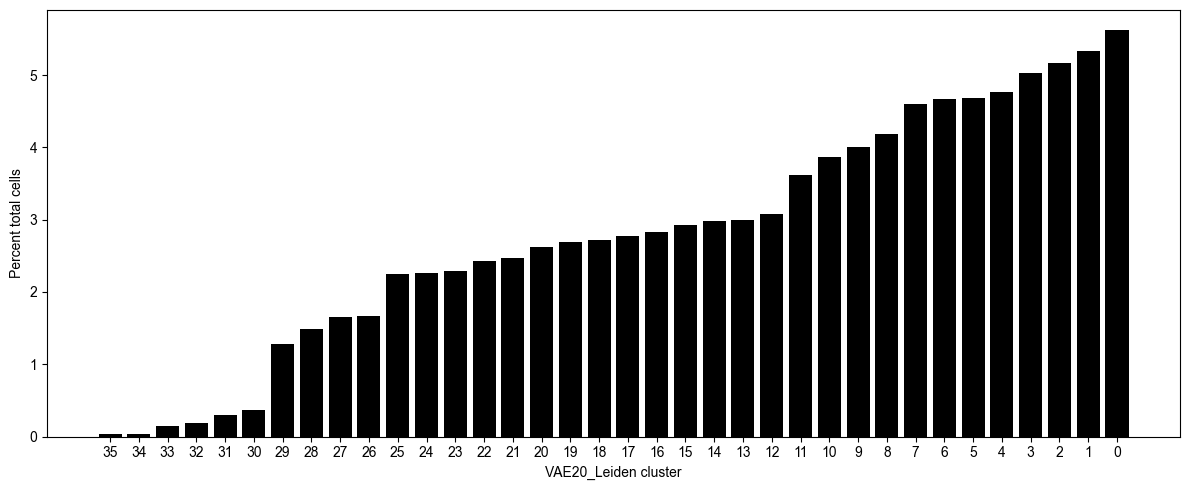

VAE20_Leiden
35    0.031464
34    0.040216
33    0.148153
32    0.183160
31    0.299015
30    0.364027
29    1.278992
28    1.481739
27    1.659481
26    1.673234
25    2.251469
24    2.257095
23    2.285017
22    2.432753
21    2.470052
20    2.628415
19    2.694469
18    2.716348
17    2.770525
16    2.833662
15    2.925138
14    2.978898
13    2.988900
12    3.074124
11    3.610893
10    3.865316
9     4.005968
8     4.178709
7     4.602956
6     4.673178
5     4.685055
4     4.763611
3     5.034288
2     5.165354
1     5.329760
0     5.618565
dtype: float64


In [5]:
# VAE9 and VAE20 cluster frequencies (after class balancing)
for clustering in ['VAE9_ROT_VIG18', 'VAE20_Leiden']: 
    
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(
        x=main.groupby(clustering).size().sort_values().index.astype('str'),
        height=(main.groupby(clustering).size().sort_values() / len(main)) * 100, color='k'
    )
    plt.xlabel(f'{clustering} cluster')
    plt.ylabel('Percent total cells')
    plt.tight_layout()
    plt.show()
    fig.savefig(os.path.join(out, f'{clustering}.pdf'))
    plt.close('all')
    print(
    (main.groupby(clustering).size().sort_values()/main.groupby(clustering).size().sort_values().sum())*100
)